# Problem Statement
- To predict whether an employee is going to leave the company in future or not ?

## How will the company profit from this solution?
- 1) After put the all input in our model then company can easily check which type of employees is going to exit or which one is stay
- 2) And After Prediction Our HR can easily understand which type of employee is exit in future 
- 3) And they will easily understand the requirement of employee

## Dataset description
- Dataset Link : https://drive.google.com/drive/folders/1yCqG4x3z6SXttr1esje3-zFg9QU7osJY
- The dataset folder contains the following files :
- Employee-turnover.csv having rows 1470 x columns 29

### Columns provided in the Dataset
- 1) Employee Count	
- 2) Employee ID	
- 3) Department	
- 4) Job Role	
- 5) Gender
- 6) Age	
- 7) Marital Status	
- 8) Education	
- 9) Education Field	
- 10) Business Travel
- 11) Distance From Home (kms)	
- 12) Job Involvement	
- 13) Job Level	
- 14) Job Satisfaction	
- 15) Monthly Income (USD)	
- 16) Salary Hike (%)	
- 17) Stock Option Level	
- 18) Over Time	
- 19) No. of Companies Worked	
- 20) Total Working Years
- 21) Years At Company	
- 22) Years In Current Role	
- 23) Years Since Last Promotion	
- 24) Years With Curr Manager	
- 25) Environment Satisfaction	
- 26) Training Times Last Year	
- 27) Work Life Balance	
- 28) Relationship Satisfaction	
- 29) Attrition (Yes/No)

***Importing Necessary Libraries***

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

Read the DataSet

In [2]:
data = pd.read_csv("Employee-turnover.csv")

Display all the columns

In [3]:
pd.set_option("display.max_columns", None)

In [4]:
data.head()

,Employee Count,Employee ID,Department,Job Role,Gender,Age,Marital Status,Education,Education Field,Business Travel,Distance From Home (kms),Job Involvement,Job Level,Job Satisfaction,Monthly Income (USD),Salary Hike (%),Stock Option Level,Over Time,No. of Companies Worked,Total Working Years,Years At Company,Years In Current Role,Years Since Last Promotion,Years With Curr Manager,Environment Satisfaction,Training Times Last Year,Work Life Balance,Relationship Satisfaction,Attrition (Yes/No)
0,1,1,Sales,Sales Executive,Female,41,Single,College,Life Sciences,Travel_Rarely,1,High,2,Very High,5993,11,0,Yes,2,8,6,4,0,5,Medium,0,Bad,Low,Yes
1,1,2,Research & Development,Research Scientist,Male,49,Married,Below College,Life Sciences,Travel_Frequently,8,Medium,2,Medium,5130,23,1,No,1,10,10,7,1,7,High,3,Better,Very High,No
2,1,4,Research & Development,Laboratory Technician,Male,37,Single,College,Other,Travel_Rarely,2,Medium,1,High,2090,15,0,Yes,6,7,0,0,0,0,Low,3,Bad,Medium,Yes
3,1,5,Research & Development,Research Scientist,Female,33,Married,Master,Life Sciences,Travel_Frequently,3,High,1,High,2909,11,0,Yes,1,8,8,7,3,0,Very High,3,Better,High,No
4,1,7,Research & Development,Laboratory Technician,Male,27,Married,Below College,Medical,Travel_Rarely,2,High,1,Medium,3468,12,1,No,9,6,2,2,2,2,Low,3,Better,Very High,No


## Basic EDA (Exploratory Data Analysis)

### Know all the columns Name

In [5]:
data.columns

Index(['Employee Count', 'Employee ID', 'Department', 'Job Role', 'Gender',
       'Age', 'Marital Status', 'Education', 'Education Field',
       'Business Travel', 'Distance From Home (kms)', 'Job Involvement',
       'Job Level', 'Job Satisfaction', 'Monthly Income (USD)',
       'Salary Hike (%)', 'Stock Option Level', 'Over Time',
       'No. of Companies Worked', 'Total Working Years', 'Years At Company',
       'Years In Current Role', 'Years Since Last Promotion',
       'Years With Curr Manager', 'Environment Satisfaction',
       'Training Times Last Year', 'Work Life Balance',
       'Relationship Satisfaction', 'Attrition (Yes/No)'],
      dtype='object')

### Knows more about the data in the columns like data type it contains and total samples of each
- Check which columns are having categorical, numerical or boolean values

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Employee Count              1470 non-null   int64 
 1   Employee ID                 1470 non-null   int64 
 2   Department                  1470 non-null   object
 3   Job Role                    1470 non-null   object
 4   Gender                      1470 non-null   object
 5   Age                         1470 non-null   int64 
 6   Marital Status              1470 non-null   object
 7   Education                   1470 non-null   object
 8   Education Field             1470 non-null   object
 9   Business Travel             1470 non-null   object
 10  Distance From Home (kms)    1470 non-null   int64 
 11  Job Involvement             1470 non-null   object
 12  Job Level                   1470 non-null   int64 
 13  Job Satisfaction            1470 non-null   obje

- 1) After checking the Dtypes of all the columns
    - A) Int64 : Numerical Values
    - B) Object : Categorical Values
- 2) There are less more Int64 values than the object values in the dataset

## Know more mathematical relations of the dataset like count, min, max values, standarad deviation values, mean and different percentile values

In [7]:
data.describe()

,Employee Count,Employee ID,Age,Distance From Home (kms),Job Level,Monthly Income (USD),Salary Hike (%),Stock Option Level,No. of Companies Worked,Total Working Years,Years At Company,Years In Current Role,Years Since Last Promotion,Years With Curr Manager,Training Times Last Year
count,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,1.0,1024.865306,36.923810,9.192517,2.063946,6502.931293,14.951701,0.793878,2.689116,11.279592,7.008163,4.229252,2.187755,4.123129,2.799320
std,0.0,602.024335,9.135373,8.106864,1.106940,4707.956783,3.533904,0.852077,2.494231,7.780782,6.126525,3.623137,3.222430,3.568136,1.289271
min,1.0,1.000000,18.000000,1.000000,1.000000,1009.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.0,491.250000,30.000000,2.000000,1.000000,2911.000000,12.000000,0.000000,1.000000,6.000000,3.000000,2.000000,0.000000,2.000000,2.000000
50%,1.0,1020.500000,36.000000,7.000000,2.000000,4919.000000,14.000000,1.000000,2.000000,10.000000,5.000000,3.000000,1.000000,3.000000,3.000000
75%,1.0,1555.750000,43.000000,14.000000,3.000000,8379.000000,17.000000,1.000000,4.000000,15.000000,9.000000,7.000000,3.000000,7.000000,3.000000
max,1.0,2068.000000,60.000000,29.000000,5.000000,19999.000000,25.000000,3.000000,9.000000,40.000000,40.000000,18.000000,15.000000,17.000000,6.000000


## Shape of data

In [8]:
print("Shape of your data : ", data.shape)

Shape of your data :  (1470, 29)


## Get the duplicated rows

In [9]:
for i in data.columns:
    print(i ,":- ", 1470 - data[i].duplicated().sum())

Employee Count :-  1
Employee ID :-  1470
Department :-  3
Job Role :-  9
Gender :-  2
Age :-  43
Marital Status :-  3
Education :-  5
Education Field :-  6
Business Travel :-  3
Distance From Home (kms) :-  29
Job Involvement :-  4
Job Level :-  5
Job Satisfaction :-  4
Monthly Income (USD) :-  1349
Salary Hike (%) :-  16
Stock Option Level :-  4
Over Time :-  2
No. of Companies Worked :-  10
Total Working Years :-  40
Years At Company :-  37
Years In Current Role :-  19
Years Since Last Promotion :-  16
Years With Curr Manager :-  18
Environment Satisfaction :-  4
Training Times Last Year :-  7
Work Life Balance :-  4
Relationship Satisfaction :-  4
Attrition (Yes/No) :-  2


## Counting the total number of missing values

In [10]:
data.isnull().sum()

Employee Count                0
Employee ID                   0
Department                    0
Job Role                      0
Gender                        0
Age                           0
Marital Status                0
Education                     0
Education Field               0
Business Travel               0
Distance From Home (kms)      0
Job Involvement               0
Job Level                     0
Job Satisfaction              0
Monthly Income (USD)          0
Salary Hike (%)               0
Stock Option Level            0
Over Time                     0
No. of Companies Worked       0
Total Working Years           0
Years At Company              0
Years In Current Role         0
Years Since Last Promotion    0
Years With Curr Manager       0
Environment Satisfaction      0
Training Times Last Year      0
Work Life Balance             0
Relationship Satisfaction     0
Attrition (Yes/No)            0
dtype: int64

Their is no any null values in our dataset

## categorical Columns Name

In [11]:
categorical_cols = data.select_dtypes(include = ["object"])
categorical_cols = categorical_cols.columns
categorical_cols

Index(['Department', 'Job Role', 'Gender', 'Marital Status', 'Education',
       'Education Field', 'Business Travel', 'Job Involvement',
       'Job Satisfaction', 'Over Time', 'Environment Satisfaction',
       'Work Life Balance', 'Relationship Satisfaction', 'Attrition (Yes/No)'],
      dtype='object')

## Numerical Columns Name

In [12]:
numerical_cols = data.select_dtypes(include = ["int64"])
numerical_cols = numerical_cols.columns
numerical_cols

Index(['Employee Count', 'Employee ID', 'Age', 'Distance From Home (kms)',
       'Job Level', 'Monthly Income (USD)', 'Salary Hike (%)',
       'Stock Option Level', 'No. of Companies Worked', 'Total Working Years',
       'Years At Company', 'Years In Current Role',
       'Years Since Last Promotion', 'Years With Curr Manager',
       'Training Times Last Year'],
      dtype='object')

# Correlation Matrix
## Why?
**A correlation matrix is a table showing correlation coefficients between variables.**

### There are three broad reasons for computing a correlation matrix:
- 1) To summarize a large amount of data where the goal is to see patterns. In our example above, the observable pattern is that all the variables highly correlate with each other.
- 2) To input into other analyses. For example, people commonly use correlation matrixes as inputs for exploratory factor analysis, confirmatory factor analysis
- 3) As a diagnostic when checking other analyses. For example, with linear regression, a high amount of correlations suggests that the linear regression estimates will be unreliable.

***correlation matrics using pandas***

In [13]:
corr = data.corr()
corr.style.background_gradient(cmap="coolwarm").set_precision(2)

,Employee Count,Employee ID,Age,Distance From Home (kms),Job Level,Monthly Income (USD),Salary Hike (%),Stock Option Level,No. of Companies Worked,Total Working Years,Years At Company,Years In Current Role,Years Since Last Promotion,Years With Curr Manager,Training Times Last Year
Employee Count,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Employee ID,nan,1.00,-0.01,0.03,-0.02,-0.01,-0.00,0.06,0.00,-0.01,-0.01,-0.01,-0.01,-0.01,0.02
Age,nan,-0.01,1.00,-0.00,0.51,0.50,0.04,0.04,0.30,0.68,0.31,0.21,0.22,0.20,-0.02
Distance From Home (kms),nan,0.03,-0.00,1.00,0.01,-0.02,0.02,0.04,-0.03,0.00,0.01,0.02,0.01,0.01,-0.04
Job Level,nan,-0.02,0.51,0.01,1.00,0.95,0.01,0.01,0.14,0.78,0.53,0.39,0.35,0.38,-0.02
Monthly Income (USD),nan,-0.01,0.50,-0.02,0.95,1.00,0.02,0.01,0.15,0.77,0.51,0.36,0.34,0.34,-0.02
Salary Hike (%),nan,-0.00,0.04,0.02,0.01,0.02,1.00,0.04,-0.00,0.02,-0.00,0.03,0.00,0.02,0.01
Stock Option Level,nan,0.06,0.04,0.04,0.01,0.01,0.04,1.00,0.03,0.01,0.02,0.05,0.01,0.02,0.01
No. of Companies Worked,nan,0.00,0.30,-0.03,0.14,0.15,-0.00,0.03,1.00,0.24,-0.12,-0.09,-0.04,-0.11,-0.06
Total Working Years,nan,-0.01,0.68,0.00,0.78,0.77,0.02,0.01,0.24,1.00,0.63,0.46,0.40,0.46,-0.04


***correlation matrics using seaborn***

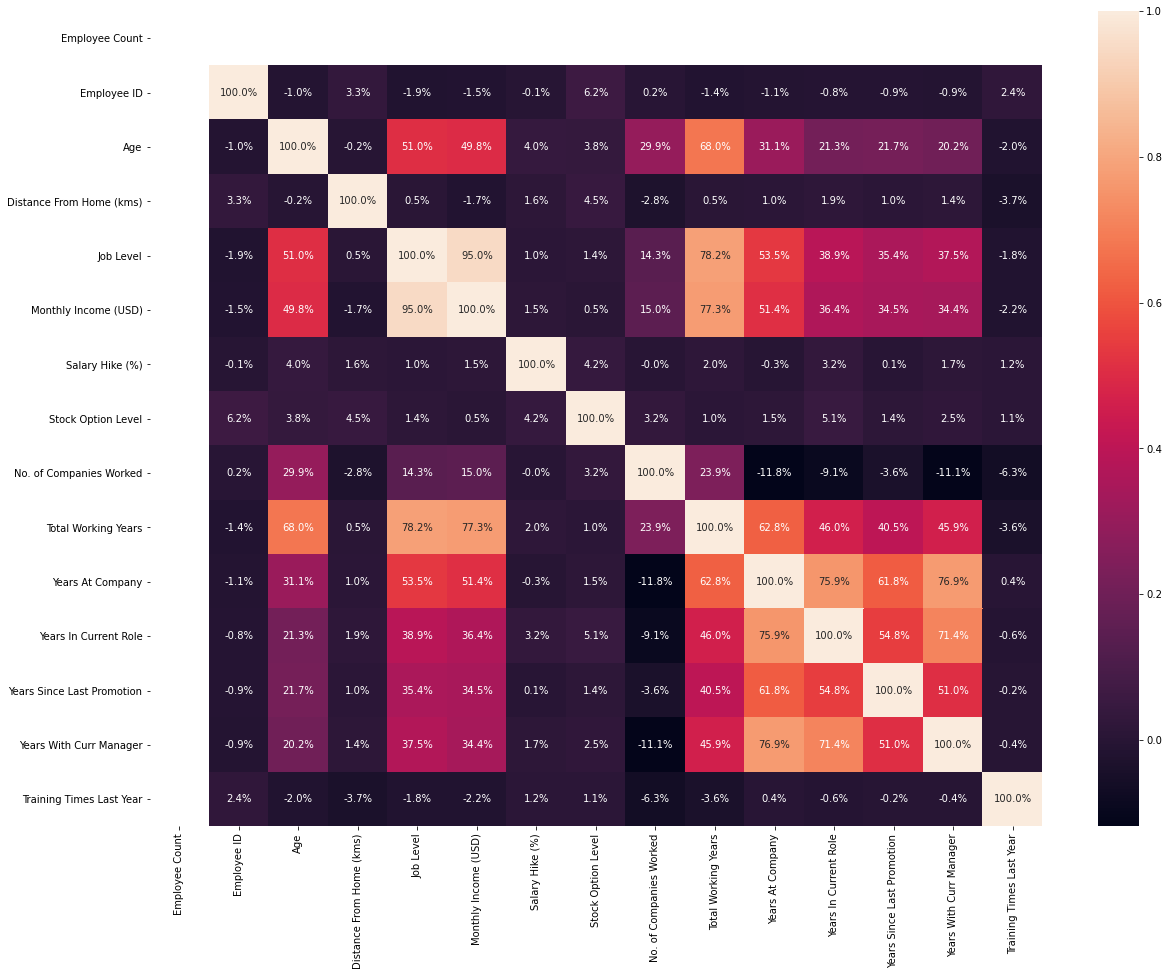

In [14]:
plt.figure(figsize=(20,15))
sns.heatmap(corr, annot=True, fmt=".1%")
plt.show()

# Scatter plot

- 1) A scatter plot is a type of plot using Cartesian coordinates to display values for typically two variables for a set of data.

- 2) The data are displayed as a collection of points, each having the value of one variable determining the position on the horizontal axis and the value of the other variable determining the position on the vertical axis.

- 3) Scatter plot's are used to observe and show relationships between two numeric variables.


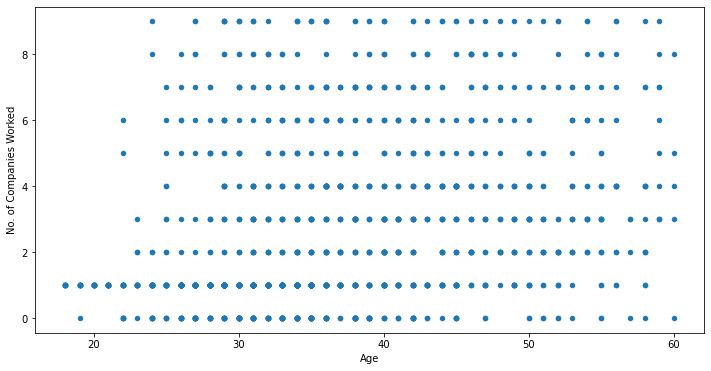

In [15]:
data.plot.scatter(x="Age", y="No. of Companies Worked", cmap="coolwarm", figsize=(12,6))
plt.show()

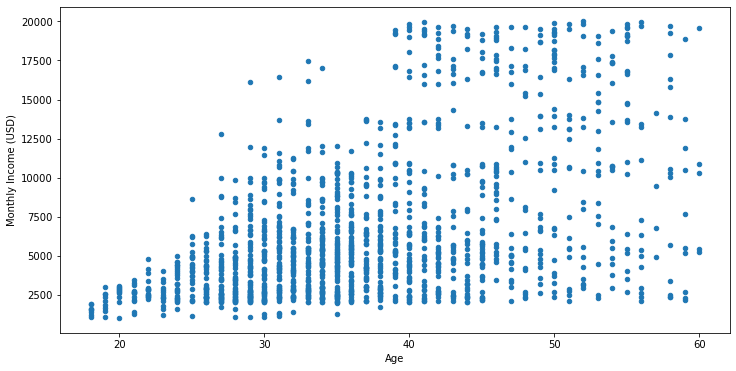

In [16]:
data.plot.scatter(x="Age", y="Monthly Income (USD)", cmap="coolwarm", figsize=(12,6))
plt.show()

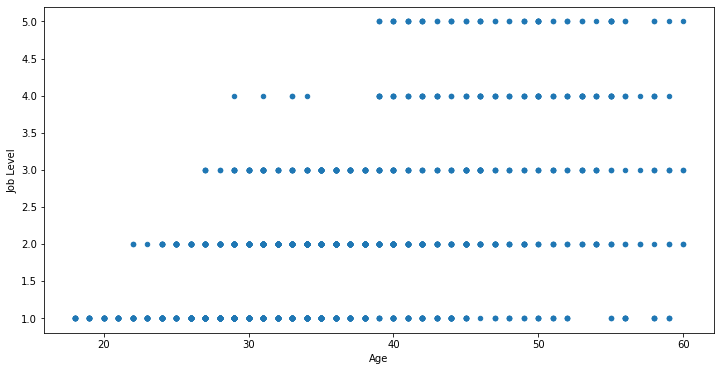

In [17]:
data.plot.scatter(x="Age", y="Job Level", cmap="coolwarm", figsize=(12,6))
plt.show()

***count plot on Attrition (Yes/No) column***

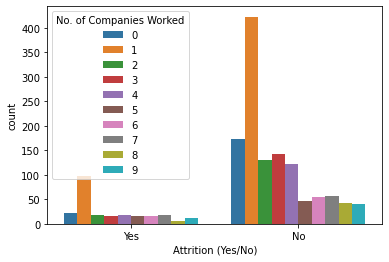

In [18]:
sns.countplot(data["Attrition (Yes/No)"], hue=data["No. of Companies Worked"])
plt.show()

***count plot on Gender column***

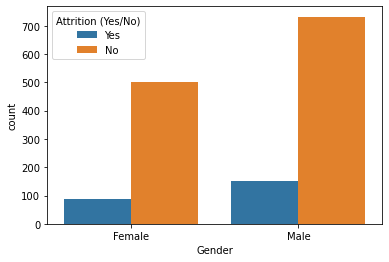

In [19]:
sns.countplot(data["Gender"], hue=data["Attrition (Yes/No)"])
plt.show()

***count plot on Marital Status***

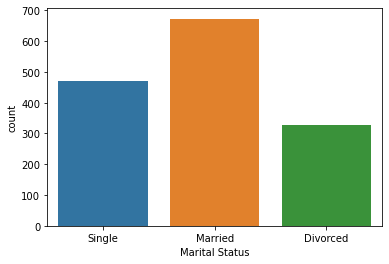

In [20]:
sns.countplot(data["Marital Status"])
plt.show()

***count plot on Marital Status***

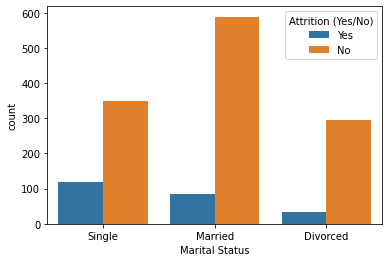

In [21]:
sns.countplot(data["Marital Status"], hue=data["Attrition (Yes/No)"])
plt.show()

***count plot on Job Satisfaction***

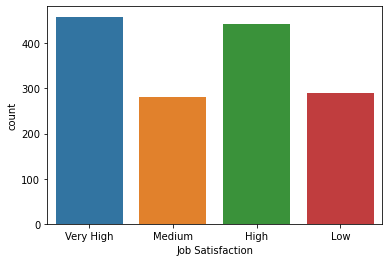

In [22]:
sns.countplot(data["Job Satisfaction"])
plt.show()

***count plot on Job Satisfaction***

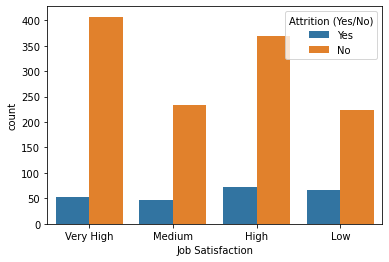

In [23]:
sns.countplot(data["Job Satisfaction"], hue=data["Attrition (Yes/No)"])
plt.show()

***count plot on Over Time***

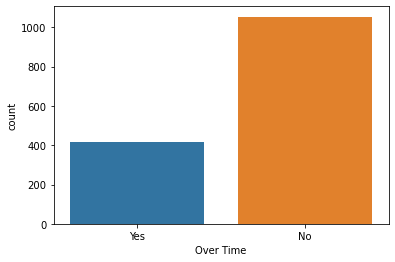

In [24]:
sns.countplot(data["Over Time"])
plt.show()

***count plot on Over Time***

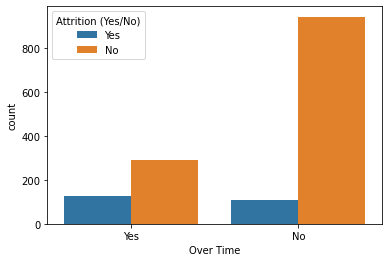

In [25]:
sns.countplot(data["Over Time"], hue=data["Attrition (Yes/No)"])
plt.show()

***Show the number of employees that left and stayed by age***

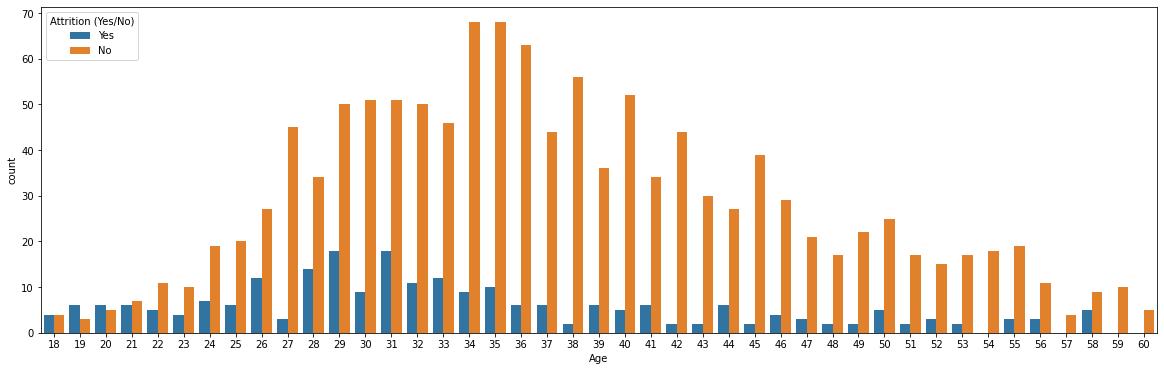

In [26]:
plt.figure(figsize=(20,6))
sns.countplot(x="Age", hue="Attrition (Yes/No)", data=data)
plt.show()

In [27]:
#Print all of the data types and their unique value
for column in data.columns:
    if data[column].dtype == object:
        print(str(column) + ' : ' + str(data[column].unique()))
        print(data[column].value_counts())
        print("\n____________________________________________________________\n")

Department : ['Sales' 'Research & Development' 'Human Resources']
Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

____________________________________________________________

Job Role : ['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources']
Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: Job Role, dtype: int64

____________________________________________________________

Gender : ['Female' 'Male']
Male      882
Female    588
Name: Gender, dtype: int64

____________________________________________________________

Marital Status

In [28]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [29]:
corr_feature = correlation(data, 0.5)

## Highly Correlated Numerical columns
- 1) Job Level
- 2) Months Incode (USD)
- 3) Total Working Years
- 4) Years At Company
- 5) Years In Current Role
- 6) Years Since Last Promotion
- 7) Years With Curr Manager
- 8) No. of Companies Worked { This column is not highly correlated. i think this less good feature for this problem solve }
- 9) Age { I don't know why i am taking this feature. becouse it is not a highly correlated feature but still i am using this feature :-( }

## Unecessary Numerical columns ( We have to drop this columns )
- 1) Employee Count
- 2) Employee ID
- 3) Distance From Home (kms)
- 4) Salary Hike (%)
- 5) Stock Option Level
- 6) Training Times Last Year

In [30]:
data = data.drop(columns=["Employee Count", "Employee ID", "Distance From Home (kms)", "Salary Hike (%)", "Stock Option Level", 
                   "Training Times Last Year"])

In [31]:
data.drop(data[data["Age"] < 10].index, inplace=True)

***Convert Attrition Categorical column to numerical***

In [32]:
def DataFrame(cols):
    if cols == "Yes":
        return 1
    else:
        return 0

In [33]:
data["Attrition (Yes/No)"] = data["Attrition (Yes/No)"].apply(DataFrame)

In [34]:
data.sample(5)

,Department,Job Role,Gender,Age,Marital Status,Education,Education Field,Business Travel,Job Involvement,Job Level,Job Satisfaction,Monthly Income (USD),Over Time,No. of Companies Worked,Total Working Years,Years At Company,Years In Current Role,Years Since Last Promotion,Years With Curr Manager,Environment Satisfaction,Work Life Balance,Relationship Satisfaction,Attrition (Yes/No)
65,Research & Development,Manager,Female,55,Divorced,Bachelor,Medical,Travel_Rarely,High,4,High,14756,Yes,2,21,5,0,0,2,Very High,Better,High,0
1242,Sales,Manager,Male,40,Single,Master,Medical,Travel_Rarely,High,5,Medium,19833,No,1,21,21,8,12,8,Medium,Good,Medium,0
1258,Research & Development,Research Scientist,Female,29,Divorced,Bachelor,Technical Degree,Travel_Rarely,Medium,1,Low,2109,No,1,1,1,0,0,0,Very High,Better,High,0
1049,Sales,Sales Executive,Male,30,Married,Below College,Life Sciences,Travel_Rarely,High,2,High,5301,No,8,4,2,1,2,2,Very High,Good,High,0
1181,Research & Development,Healthcare Representative,Female,49,Married,Below College,Life Sciences,Travel_Rarely,Medium,4,High,13966,Yes,2,30,15,11,2,12,High,Better,Medium,0


In [35]:
X = data.drop(columns=["Attrition (Yes/No)"])
y = data["Attrition (Yes/No)"]

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=1)

## Columns for OneHotEncoding

In [38]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer

In [39]:
trf1 = ColumnTransformer([
    ('OHE', OneHotEncoder(sparse=False),[0,1,2,4,5,6,7,8,10,12,19,20,21])
],remainder="passthrough")

## Model Building Using RandomForestClassifier

In [40]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

In [41]:
RF = RandomForestClassifier(n_estimators=650, max_depth=25, random_state=1)

pipe = Pipeline([
    ('trf1',trf1),
    ('RF',RF)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

# sklearn.metrics.confusion_matrix

In [42]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [43]:
confusion_matrix(y_test, y_pred)

array([[232,   4],
       [ 24,  34]], dtype=int64)

In [44]:
X_test.shape

(294, 22)

## Accuracy Score

In [45]:
print(accuracy_score(y_test,y_pred) * 100)

90.47619047619048
